### Naive Bayes

In [3]:
from sklearn import preprocessing

In [8]:
weather = ["sunny", "sunny","overcast", "rainy", "rainy", "rainy", "overcast","sunny","sunny","rainy", "sunny", "overcast", "overcast", "rainy" ]
temp = ['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']
play = ['no', 'no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

In [9]:
le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [11]:
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)

print('Temp: ',temp_encoded)
print('Play: ',label)

Temp:  [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [12]:
features = list(zip(weather_encoded, temp_encoded))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [19]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(features, label)

predicted = model.predict([[0,2]])
print('Predicted Value:',predicted)

Predicted Value: [1]


### Decission Tree

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin',
            'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", header=1, names=col_names)

In [26]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [28]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  767 non-null    int64  
 1   glucose   767 non-null    int64  
 2   bp        767 non-null    int64  
 3   skin      767 non-null    int64  
 4   insulin   767 non-null    int64  
 5   bmi       767 non-null    float64
 6   pedigree  767 non-null    float64
 7   age       767 non-null    int64  
 8   label     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
numer = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree', 'label']

for col in numer:
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [30]:
pima.dropna(inplace=True)

In [31]:
features_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

X = pima[features_cols]
Y = pima.label

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [64]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [65]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7186147186147186


In [66]:
import sklearn.tree as tree
import pydotplus
from IPython.display import Image
from six import StringIO
from graphviz import Graph

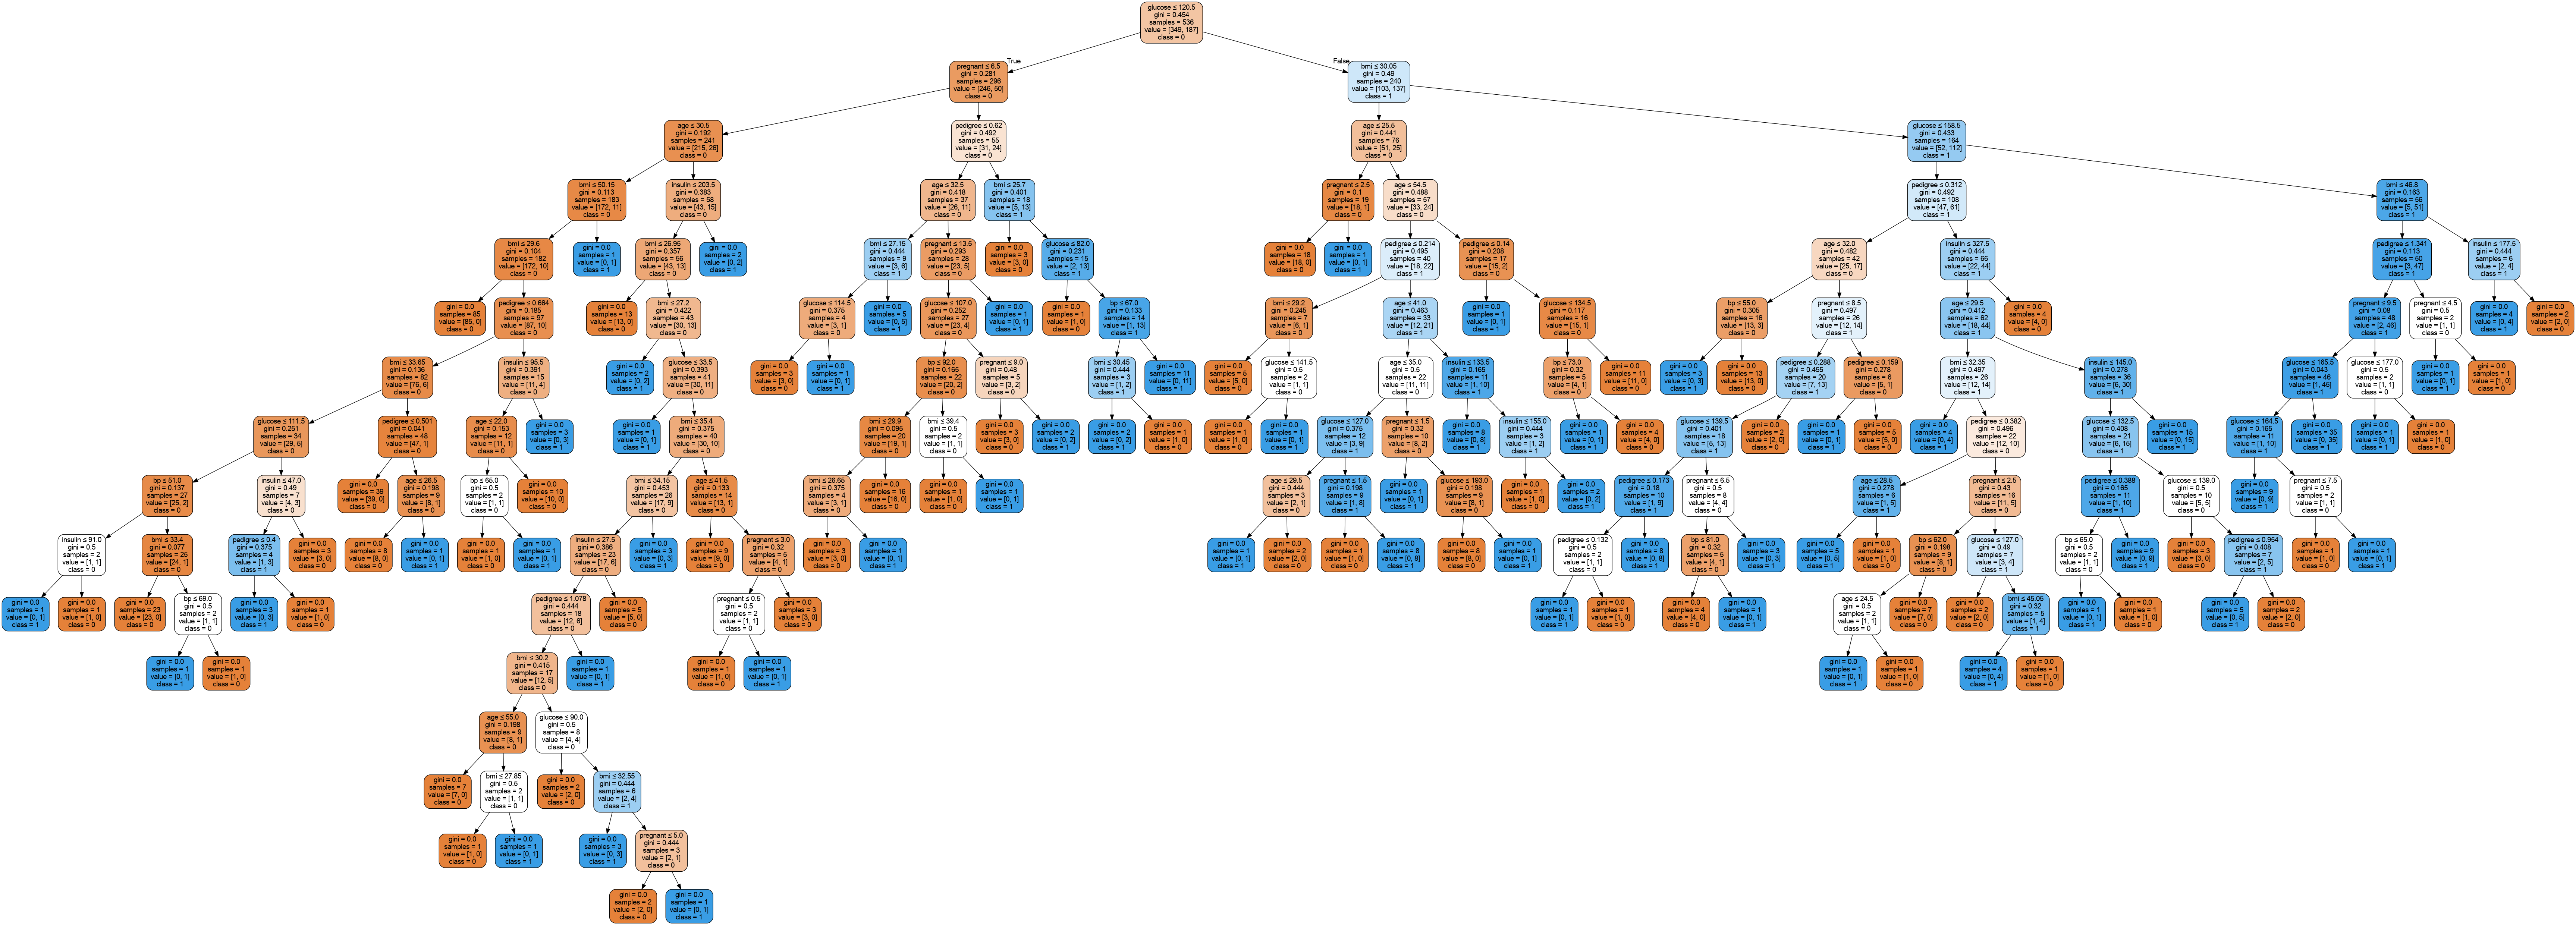

In [67]:
dot_data = StringIO()
tree.export_graphviz(clf,
                    out_file=dot_data,
                    class_names=['0','1'],
                    feature_names=features_cols,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [68]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy', metrics.accuracy_score(y_test, y_pred))

accuracy 0.70995670995671


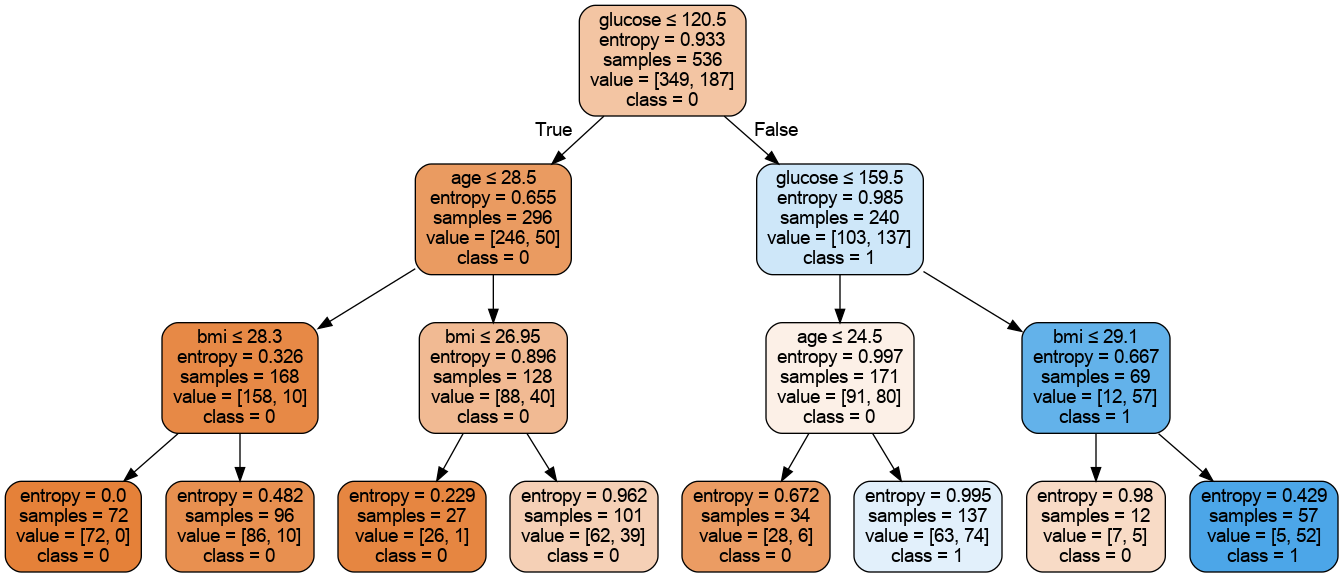

In [69]:
dot_data = StringIO()
tree.export_graphviz(clf,
                    out_file=dot_data,
                    class_names=['0','1'],
                    feature_names=features_cols,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [77]:
import sklearn.datasets as datasets
from  sklearn.ensemble import RandomForestClassifier
import pandas as pd


In [78]:
datasets = datasets.load_iris()

In [79]:
irisDF = pd.DataFrame({
    "sepal_length" : datasets.data[:, 0], 
    "petal_length" : datasets.data[: ,2],
    "petal_width" : datasets.data[:, 3],
    "species": datasets.target
})

irisDF.head()

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datasets.data, datasets.target, test_size=0.3, random_state=109)

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [83]:
from sklearn import metrics
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.9333333333333333


In [84]:
clf.predict

<bound method ForestClassifier.predict of RandomForestClassifier()>